# **CSM6120 (Year 2022-23)**

**Feedback for Practical1:** Informed search techniques (28 October 2022)

**Acknowledgements:** This is a simplified version of the original (https://gist.github.com/ryancollingwood/32446307e976a11a1185a5394d6657bc), many thanks.

**Investigated Problem:** A maze is the subject that we shall have a look in this practical. 










### **Code section 1**: initialising a package and define the 'Node' class

In [ ]:
# Initialisation of required package/library and defining a class to represents nodes in a search tree/space.
import numpy as np

class Node:
    """
        A 'Node' class for the implementation of A* search (for a maze problem)
        - 'parent' is parent of the current Node,
        - 'position' is current position of the Node in the maze,
        - 'g' is cost from start Node to current Node,
        - 'h' is heuristics based cost for current Node to the goal Node, and
        - 'f' is the total cost of current Node, i.e., f = g + h
    """

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

### **Code section 2**: defining the 'return_path' function that create the path, from the end node back to the start node. It will be used in the main search function, shown in Code section 3

In [ ]:
#This function returns the path of A* search/ It will be exploited in the next function that implements A* procedure.

def return_path(current_node, maze):

    # path is emplty, at first
    path = []

    # get dimenion of the maze
    no_rows, no_columns = np.shape(maze)
    
    # initialise the result maze with all positions having value -1
    result = [[-1 for i in range(no_columns)] for j in range(no_rows)]

    # build up a path
    current = current_node
    while current is not None:
        path.append(current.position)
        current = current.parent

    # Return the reversed path to illustrate from the start to the end node
    path = path[::-1]

    # update the result maze with the reversed path
    start_value = 0
    for i in range(len(path)):
        result[path[i][0]][path[i][1]] = start_value
        start_value += 1
    return result

### **Code section 3**: defining the main function, 'AStar'.

Note: the following statement is added from the previous version, to see how many cycles the search process actually goes through, before reaching the end node.

"*print("Iteration: ", outer_iterations)*"

In [ ]:
# The core function for A* search 
def AStar(maze, cost, start, end):
    """
        A list of inputs:
          - 'maze' is the matrix representing a problem
          - 'cost' is the number, a cost to move from one position to the next
          - 'start' is the tuple representing the start location
          - 'end' is the tuple representing the goal/end location
        It returns a list of [tuples] as a path from the given 'start' to 'end' states in the 'maze'
    """
    ####################################################### 1st part - initialisation ################################################

    # Create start and end nodes with initial/default values for g, h and f
    start_node = Node(None, tuple(start))
    start_node.g = 0
    start_node.h = 0
    start_node.f = 0

    end_node = Node(None, tuple(end))
    end_node.g = 0
    end_node.h = 0
    end_node.f = 0

    # Initialize 'yet_to_visit' and 'visited' lists, they are empty initially.
    # All nodes in the 'yet_to_visit' are candidates for exploration, from which the one with the lowest cost will be expanded first. 
    # The second list, 'visited', is for book keeping, so that nodes already been explored will not be picked up again!

    yet_to_visit_list = []  
    
    visited_list = [] 
    
    # Add the start node. So at the beginning, there will be only the 'start_node' in this list
    yet_to_visit_list.append(start_node)
    
    # Add a stop condition. This is to avoid any infinite loop and stop execution after some reasonable number of steps
    outer_iterations = 0
    max_iterations = (len(maze) // 2) ** 10
    
    # You can un-comment the following to see this number.
    # print(max_iterations)

    # There are at most four possible operations or moves from any location in the maze 
    move  =  [[-1, 0 ], # go up
              [ 0, -1], # go left
              [ 1, 0 ], # go down
              [ 0, 1 ]] # go right

    #find maze has got how many rows and columns 
    no_rows, no_columns = np.shape(maze)

  ####################################################### 2nd part - the search process ################################################

    """
        1) Check max iteration reached or not . Set a message and stop execution
        2) We first get the 'current_node' from the 'yet_to_visit_list'. By comparing f costs of all nodes in that list, the one with
           the lowest f cost will be selected
        3) Remove the selected node from yet_to_visit list and add this node to visited list
        4) Test whether the 'current_node' is a goal. If so, return the path. If not, continue with the following steps
        5) For selected node find out all children (use 'move' to find children)
            a) get the current postion for the selected node (this becomes parent node for the children)
            b) check if a valid position exist (boundary will make few nodes invalid)
            c) if the new node is a no-go cell then ignore that
            d) add it to valid children node list for the selected parent
            
        6) For all the children node
            a) if a child is in 'visited_list' then ignore it and try the next one
            b) otherwise, calculate for the child node, its g, h and f values
            c) if the child is already in 'yet_to_visit_list', ignore it
            d) otherwise, move add child to 'yet_to_visit_list'
    """
    
    # Loop until you find the 'end' state, or are forced to stop whilst exceeding the maximum iteration
    
    while len(yet_to_visit_list) > 0:
        
        # 1) Every time any node is selected from 'yet_to_visit list', counter of the limit to operation is incremented
        # If the current processing cycle exceeds the maximum iteration, just terminate as this search becomes too expensive!

        outer_iterations += 1   
        print("Iteration: ", outer_iterations)

        if outer_iterations > max_iterations:
            print ("giving up on pathfinding too many iterations")
            return return_path(current_node,maze)

        
        # 2) Get the current node, with the lowest f
        current_node = yet_to_visit_list[0]
        current_index = 0
        for index, item in enumerate(yet_to_visit_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index
                

        # 3) Pop current node out off 'yet_to_visit_list', and add it to 'visited_list'
        yet_to_visit_list.pop(current_index)
        visited_list.append(current_node)


        # 4) Test if the goal is reached or not, if yes, then return the path
        if current_node == end_node:
            return return_path(current_node,maze)

        # If the goal is not yet reached, continue with the following steps.
        # 5) Generate children of 'current_node'
        children = []

        for new_position in move: 

            # 5a) Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # 5b) Make sure it is within the range (i.e., check if it is within the maze boundary)
            if (node_position[0] > (no_rows - 1) or 
                node_position[0] < 0 or 
                node_position[1] > (no_columns -1) or 
                node_position[1] < 0):
                continue

            # 5c) Make sure it is a walkable cell
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # 5d) Create a new node and append it to the 'children' list
            new_node = Node(current_node, node_position)
            children.append(new_node)


        # 6) Loop through 'children' list
        for child in children:
            
            # 6a) If a child in this list is on 'visited_list' (search entire visited list), simply ignore it
            if len([visited_child for visited_child in visited_list if visited_child == child]) > 0:
                continue

            # 6b) Create f, g, and h values
            child.g = current_node.g + cost
            ## Heuristic costs calculated here, this is using eucledian distance
            child.h = np.sqrt(((child.position[0] - end_node.position[0]) ** 2) + 
                       ((child.position[1] - end_node.position[1]) ** 2)) 

            child.f = child.g + child.h

            # 6c) Child is already in the yet_to_visit list and g cost is already lower
            if len([i for i in yet_to_visit_list if child == i and child.g > i.g]) > 0:
                continue

            # 6d) Add the child to 'yet_to_visit_list'
            yet_to_visit_list.append(child)


### **Code section 4**: this is a user section, in which you can create instances of 'maze', 'start', 'end' and 'cost'. These will be used as input arguments as you call the 'AStar' function. The result is recorded in the variable named 'path'.

About the results:

*   At first, you will see print-outs of iteration numbers, to show how many cycles the search has gone through before reaching the end node. It might be more than you think! In this case, it is 24.
*   You would see the path shown in the matrix-like maze, incrementing from '0' to the end, which is '9' in this case.




In [ ]:
# This section is the user defined initialisation and call of the search function

# Initialisation of maze, where '1' denote a no-go or bloacked location
maze = [[0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0]]
    
start = [0, 0] # starting position
end = [4,5] # ending position
cost = 1 # cost per movement

# Create a path solution by calling the 'AStar' function with those parameters specified above
path = AStar(maze,cost,start,end)

# print out the path solution, as a sequence of running numbers (staring from 0) in the matrix presentation of thia maze
print('\n'.join([''.join(["{:" ">3d}".format(item) for item in row]) 
      for row in path]))



Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
  0 -1 -1 -1 -1 -1
  1  2  3  4  5 -1
 -1 -1 -1 -1  6  7
 -1 -1 -1 -1 -1  8
 -1 -1 -1 -1 -1  9


### **Exercise 1**: please compare this with yours.

In [ ]:
# Exercise1: another arrangement of blocked cells

# Initialisation of maze, where '1' denote a no-go or bloacked location
maze = [[0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0]]
    
start = [0, 0] # starting position
end = [4,5] # ending position
cost = 1 # cost per movement

# Create a path solution by calling the 'AStar' function with those parameters specified above
path = AStar(maze,cost,start,end)

# print out the path solution, as a sequence of running numbers (staring from 0) in the matrix presentation of thia maze
print('\n'.join([''.join(["{:" ">3d}".format(item) for item in row]) 
      for row in path]))


Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
  0 -1 -1 -1 -1 -1
  1  2  3  4  5 -1
 -1 -1 -1 -1  6 -1
 -1 -1 -1 -1  7 -1
 -1 -1 -1 -1  8  9


### **Exercise 2**: please compare this with yours.

In [ ]:
# Exercise2: another arrangement of blocked cells

# Initialisation of maze, where '1' denote a no-go or bloacked location
maze = [[0, 1, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 1],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0]]
    
start = [0, 0] # starting position
end = [4,5] # ending position
cost = 1 # cost per movement

# Create a path solution by calling the 'AStar' function with those parameters specified above
path = AStar(maze,cost,start,end)

# print out the path solution, as a sequence of running numbers (staring from 0) in the matrix presentation of thia maze
print('\n'.join([''.join(["{:" ">3d}".format(item) for item in row]) 
      for row in path]))

Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
  0 -1  6  7  8 -1
  1 -1  5 -1  9 -1
  2  3  4 -1 10 -1
 -1 -1 -1 -1 11 -1
 -1 -1 -1 -1 12 13


In [ ]:
# Exercise3: another arrangement of blocked cells

# Initialisation of maze, where '1' denote a no-go or bloacked location
maze = [[0, 1, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 1],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0]]
    
start = [0, 0] # starting position
end = [4,5] # ending position
cost = 1 # cost per movement

# Create a path solution by calling the 'AStar' function with those parameters specified above
path = AStar(maze,cost,start,end)

# print out the path solution, as a sequence of running numbers (staring from 0) in the matrix presentation of thia maze
print('\n'.join([''.join(["{:" ">3d}".format(item) for item in row]) 
      for row in path]))

Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
  0 -1  6  7  8 -1
  1 -1  5 -1  9 -1
  2  3  4 -1 10 -1
 -1 -1 -1 -1 11 -1
 -1 -1 -1 -1 12 13


In [ ]:
# Exercise3: another arrangement of blocked cells

# Initialisation of maze, where '1' denote a no-go or bloacked location
maze = [[0, 1, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 1, 0, 1, 1, 0],
        [0, 0, 0, 1, 1, 0]]
    
start = [0, 0] # starting position
end = [4,5] # ending position
cost = 1 # cost per movement

# Create a path solution by calling the 'AStar' function with those parameters specified above
path = AStar(maze,cost,start,end)

# print out the path solution, as a sequence of running numbers (staring from 0) in the matrix presentation of thia maze
print('\n'.join([''.join(["{:" ">3d}".format(item) for item in row]) 
      for row in path]))

Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
  0 -1  6  7  8 -1
  1 -1  5 -1  9 -1
  2  3  4 -1 10 11
 -1 -1 -1 -1 -1 12
 -1 -1 -1 -1 -1 13


### **Exercise 4**: please compare this with yours.

In [ ]:
# Exercise4: a bigger maze

# Initialisation of maze, where '1' denote a no-go or bloacked location
maze = [[0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0],
        [0, 1, 0, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]]
    
start = [0, 0] # starting position
end = [4,5] # ending position
cost = 1 # cost per movement

# Create a path solution by calling the 'AStar' function with those parameters specified above
path = AStar(maze,cost,start,end)

# print out the path solution, as a sequence of running numbers (staring from 0) in the matrix presentation of thia maze
print('\n'.join([''.join(["{:" ">3d}".format(item) for item in row]) 
      for row in path]))

Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29
Iteration:  30
Iteration:  31
Iteration:  32
Iteration:  33
Iteration:  34
Iteration:  35
Iteration:  36
Iteration:  37
Iteration:  38
Iteration:  39
Iteration:  40
Iteration:  41
Iteration:  42
Iteration:  43
Iteration:  44
Iteration:  45
Iteration:  46
Iteration:  47
Iteration:  48
Iteration:  49
Iteration:  50
Iteration:  51
Iteration:  52
Iteration:  53
Iteration:  54
Iteration:  55
Iteration:  56
Iteration:  57
Iteration:  58
Iteration:  59
Iteration:  60
Iteration:  61
Iteration:  62
Iteration:  63
Iteration:  64
Iteration:  65
Iteration:  66
Iteration:  67
Iter

### **Exercise 5**: possible solutions are given below.

**Alternative 1**: change the code shown in the following image to

"*if item.g < current_node.g:*"


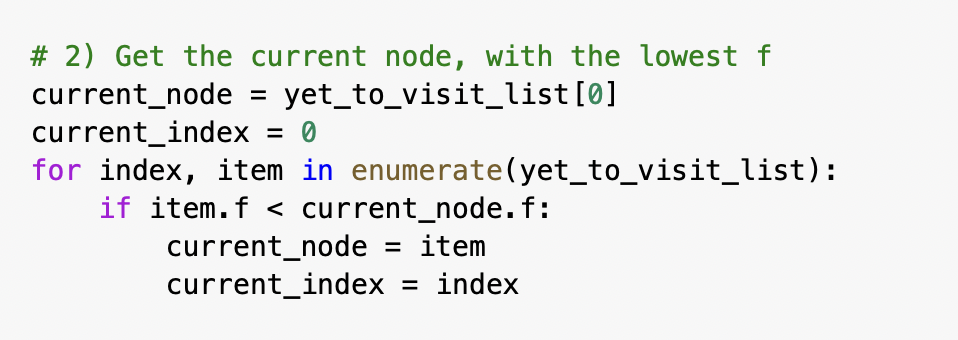





**Alternative 2**: change the code shown in the following image to

"*child.f = child.g*"

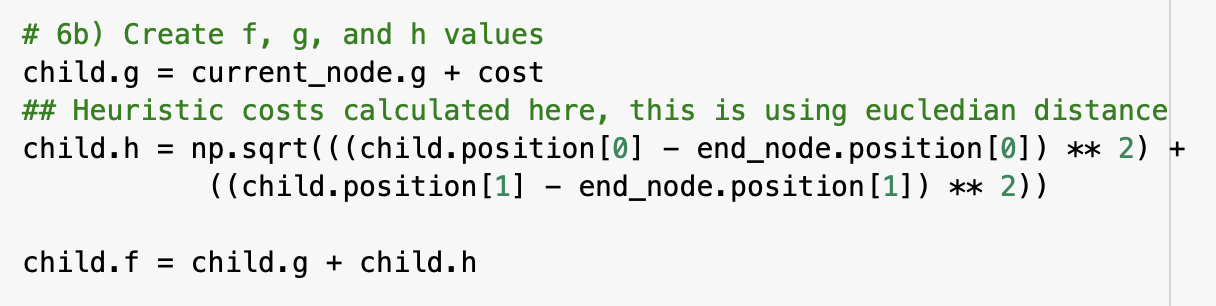

